In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

Applying a basic 3x3 identity kernel to a greyscal image [1] using a 2D convolution function (e.g., cv2.filter2D).


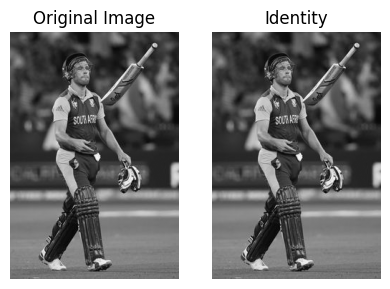


 The output remains the same as the original image.


In [ ]:
#Task-1
img_path = '/content/Image 1.jpg'
grey_img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)


identity_kernel=np.array([[0, 0, 0],
                          [0, 1, 0],
                          [0, 0, 0]], dtype=np.float32)


convoluted_img = cv2.filter2D(grey_img, -1, identity_kernel)

plt.figure(figsize=(10, 8))

plt.subplot(1, 4, 1)
plt.imshow(grey_img, cmap='gray')
plt.title(f'Original Image')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(convoluted_img, cmap='gray')
plt.title('Identity')
plt.axis('off')


plt.show()

print(f"\n The output remains the same as the original image.")

- Designing a 3x3 custom kernel to create a sharpening effect on an image [2].
- Describing how this kernel affects the overall clarity and contrast of the image.


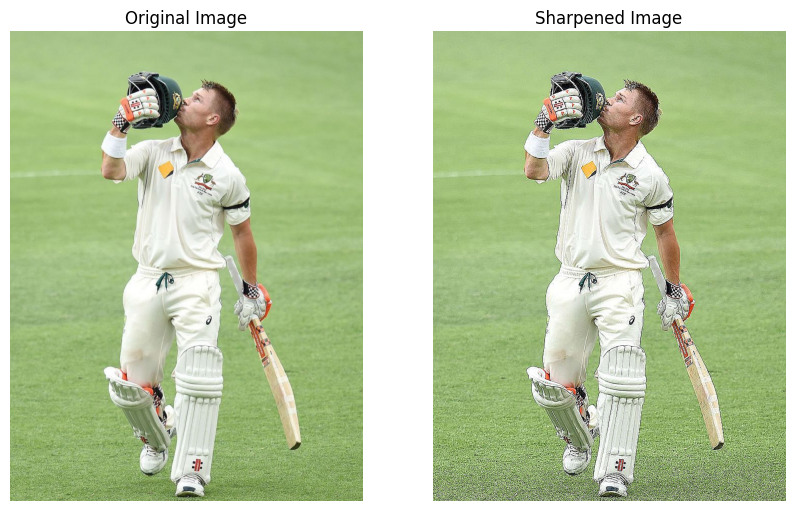


 The increase in the sharpness of the image is clearly visible


In [ ]:
#Task-2
img2=cv2.cvtColor(cv2.imread('/content/Image 2.jpg'), cv2.COLOR_BGR2RGB)

s_kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])

sharpened_img2=cv2.filter2D(img2, -1, s_kernel)

plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(img2, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Sharpened Image")
plt.imshow(sharpened_img2)
plt.axis('off')
plt.show()

print(f"\n The increase in the sharpness of the image is clearly visible")

    Experiment with Different Padding Techniques
Applying the sharpening kernel created in Step 1 to an image[3] with three different padding types:
- constant (zero-padding)
- reflect padding
- edge padding.

Filtering for Noise Reduction and Smoothing



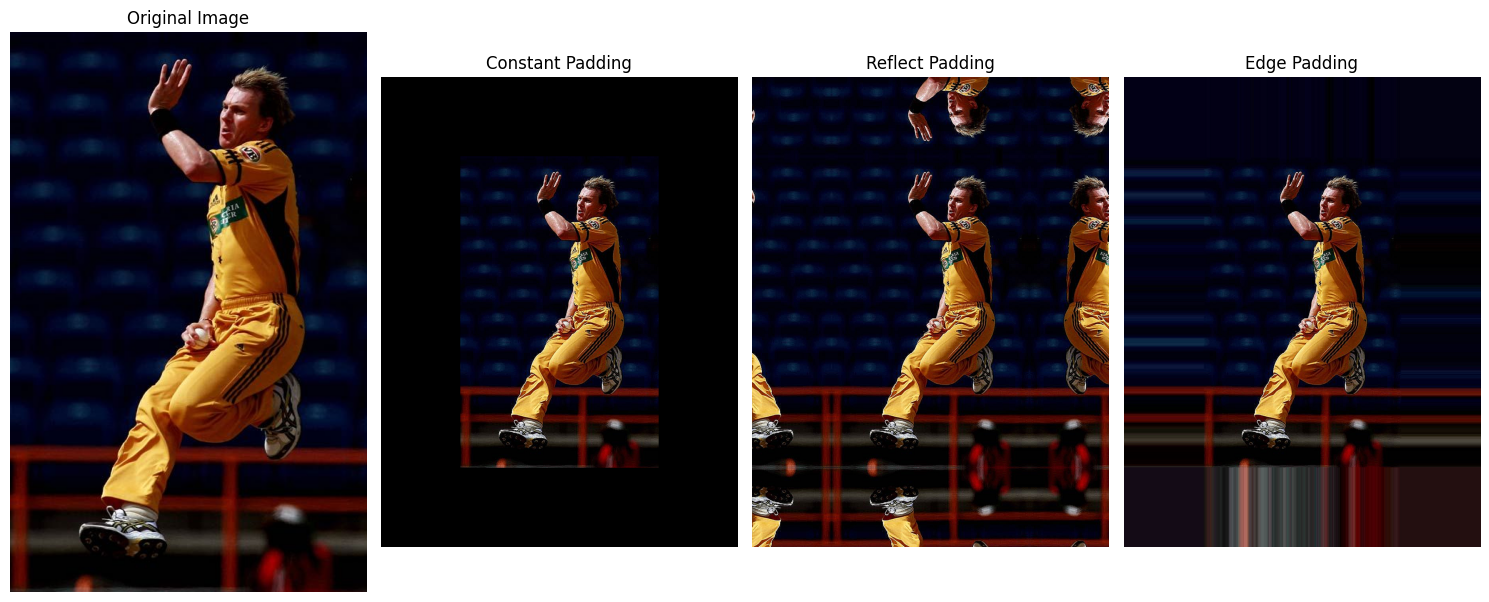

In [ ]:
#Task-3
img3=cv2.cvtColor(cv2.imread('/content/Image 3.jpg'), cv2.COLOR_BGR2RGB)

sharpened_img3=cv2.filter2D(img3, -1, s_kernel)

padding = ((200, 200), (200, 200), (0, 0))

const_padded = np.pad(sharpened_img3, pad_width= padding, mode='constant')
reflect_padded = np.pad(sharpened_img3, pad_width=padding, mode='reflect')
edge_padded = np.pad(sharpened_img3, pad_width=padding, mode='edge')

plt.figure(figsize=(15, 7))

plt.subplot(1, 4, 1)
plt.title("Original Image")
plt.imshow(img3)
plt.axis("off")

plt.subplot(1, 4, 2)
plt.title("Constant Padding")
plt.imshow(const_padded)
plt.axis("off")

plt.subplot(1, 4, 3)
plt.title("Reflect Padding")
plt.imshow(reflect_padded)
plt.axis("off")

plt.subplot(1, 4, 4)
plt.title("Edge Padding")
plt.imshow(edge_padded)
plt.axis("off")

plt.tight_layout()
plt.show()

    Adding Noise and Applying an Average Filter
- Adding Gaussian noise to an image[4].
- Applying a 5x5 average filter using cv2.blur
- observing the changes in noise level and overall appearance of the image.
  

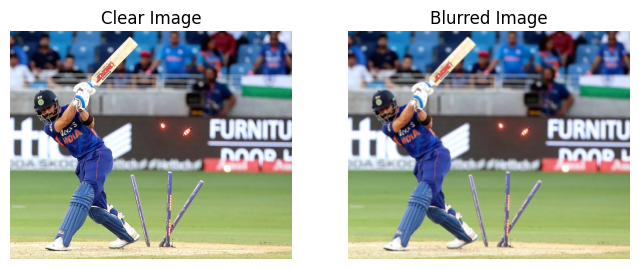


Slight blur is seen in the image


In [ ]:
#Task-4

img4=cv2.cvtColor(cv2.imread('/content/Image 4.jpg'), cv2.COLOR_BGR2RGB)

noisy_img4=img4 + np.random.normal(0, 25, img4.shape).astype(np.uint8)

blurred_image = cv2.blur(img4, (5, 5))

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(img4)
plt.title('Clear Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(blurred_image)
plt.title('Blurred Image')
plt.axis('off')

plt.show()

print(f'\nSlight blur is seen in the image')

    Gaussian Blur for Smoothing
- Apply a Gaussian blur to the noisy image created in Part 4 using a 5x5 Gaussian kernel (cv2.GaussianBlur).
- Experiment with different standard deviations (sigma values)
- observe how the level of smoothing changes.



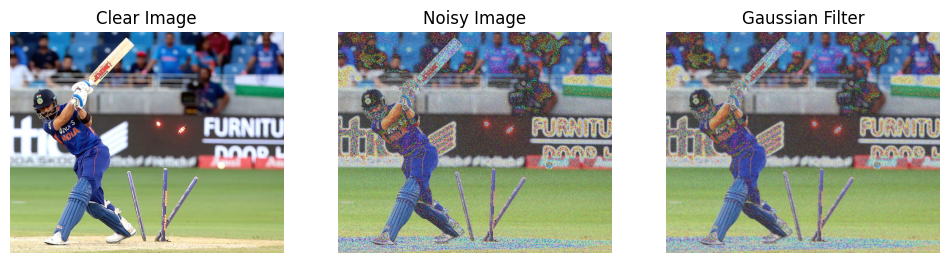


 The additon of Gaussian Noise made the image quite noisy. After the Gaussian Blurr the noise is a bit reduced


In [ ]:
#Task-5

filtered_image = cv2.GaussianBlur(noisy_img4, (5, 5), sigmaX=0)

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(img4)
plt.title('Clear Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(noisy_img4)
plt.title('Noisy Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(filtered_image)
plt.title('Gaussian Filter')
plt.axis('off')

plt.show()

print(f'\n The additon of Gaussian Noise made the image quite noisy. After the Gaussian Blurr the noise is a bit reduced')

    Edge Detection and Gradient Calculation
- Applying Laplacian Filter to detect edges in a clear image[5].
- Applying the Laplacian filter on the grayscale image
- Visualizing the results.
   

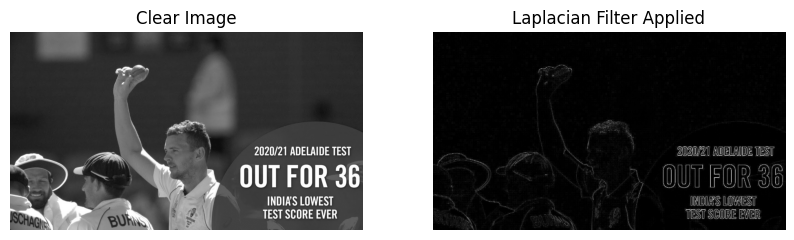

In [ ]:
#Task-6

img5 = cv2.imread('/content/Image 5.jpg', cv2.IMREAD_GRAYSCALE)

laplacian_filtered_image = cv2.Laplacian(img5, cv2.CV_64F)
laplacian_filtered_image = cv2.convertScaleAbs(laplacian_filtered_image)


plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img5, cmap='gray')
plt.title('Clear Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(laplacian_filtered_image, cmap='gray')
plt.title('Laplacian Filter Applied')
plt.axis('off')

plt.show()

    Estimating Horizontal and Vertical Gradients
To estimate the edges in horizontal and vertical directions:
- Applying two simple gradient kernels for vertical and horizontal edges

- Applying each kernel separately to an image[6] and visualize the results to observe the types of edges each captures.


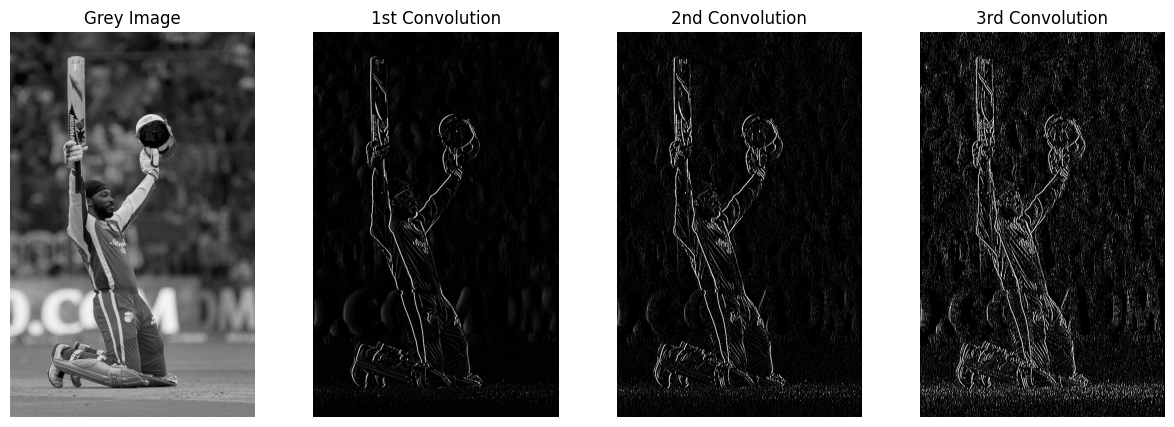

In [ ]:
#Task-7

img6 = cv2.imread('/content/Image 6.jpg', cv2.IMREAD_GRAYSCALE)

v_kernel = np.array([[-1,0,1],
                      [-1,0,1],
                      [-1,0,1]], dtype=np.float32)

h_kernel = np.array([[-1,-1,-1],
                      [0,0,0],
                      [1,1,1]], dtype=np.float32)

v_conv_1 = cv2.filter2D(img6,-1,v_kernel)
v_conv_2 = cv2.filter2D(v_conv_1,-1,v_kernel)
v_conv_3 = cv2.filter2D(v_conv_2,-1,v_kernel)

plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.imshow(img6, cmap='gray')
plt.title(f'Grey Image')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(v_conv_1, cmap='gray')
plt.title('1st Convolution')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(v_conv_2, cmap='gray')
plt.title('2nd Convolution')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(v_conv_3, cmap='gray')
plt.title(f'3rd Convolution')
plt.axis('off')

plt.show()




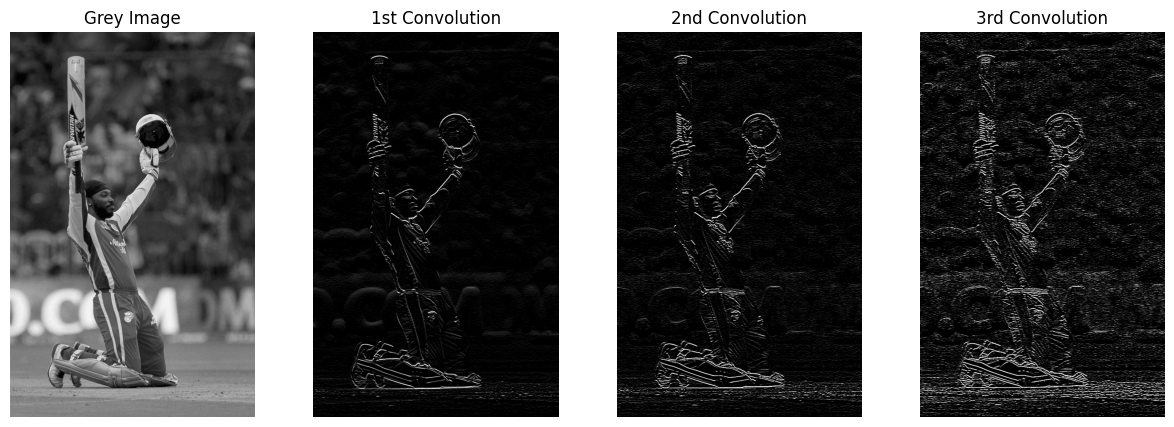

In [ ]:

h_conv_1 = cv2.filter2D(img6,-1,h_kernel)
h_conv_2 = cv2.filter2D(h_conv_1,-1,h_kernel)
h_conv_3 = cv2.filter2D(h_conv_2,-1,h_kernel)

plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.imshow(img6, cmap='gray')
plt.title(f'Grey Image')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(h_conv_1, cmap='gray')
plt.title('1st Convolution')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(h_conv_2, cmap='gray')
plt.title('2nd Convolution')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(h_conv_3, cmap='gray')
plt.title(f'3rd Convolution')
plt.axis('off')

plt.show()



For this image **horizontal** kernel worked better than vertical kernel.
the horizontal edges highlighted more details of the image.

    Image Enhancement through Histogram Equalization

- Loading a low-contrast grayscale image[7] and apply histogram equalization.
- Observing and describing how the contrast improves.


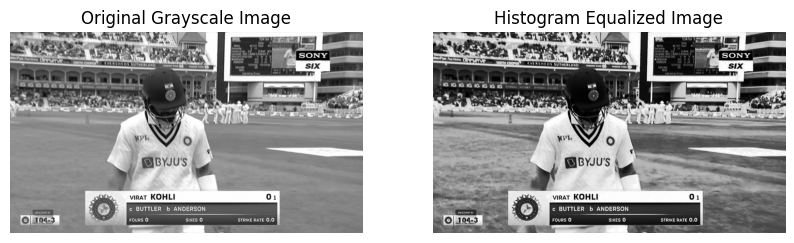


 Here the contrast has increased meaning the light and dark shades become more visible


In [ ]:
#Task-8.1
img7 = cv2.imread('/content/Image 7.jpg', cv2.IMREAD_GRAYSCALE)

equalized_image = cv2.equalizeHist(img7)
# Plotting the images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img7, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title('Histogram Equalized Image')
plt.axis('off')

plt.show()

print(f"\n Here the contrast has increased meaning the light and dark shades become more visible")

- Applying histogram equalization three times on the original image[7]
- Describing any diminishing effects or artifacts that appear.

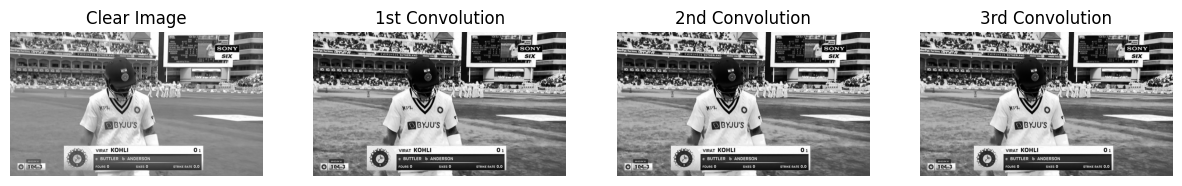


 While the effect of histogram equalization is noticable for the 1st image, the 2nd and 3rd don't make that much of a difference


In [ ]:
#Task-8.2

first_eq = cv2.equalizeHist(img7)
second_eq = cv2.equalizeHist(first_eq)
third_eq = cv2.equalizeHist(second_eq)

plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.imshow(img7, cmap='gray')
plt.title(f'Clear Image')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(first_eq, cmap='gray')
plt.title('1st Convolution')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(second_eq, cmap='gray')
plt.title('2nd Convolution')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(third_eq, cmap='gray')
plt.title(f'3rd Convolution')
plt.axis('off')

plt.show()

print(f"\n While the effect of histogram equalization is noticable for the 1st image, the 2nd and 3rd don't make that much of a difference")